# Import

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from google.colab import files
import scipy.stats as stats
import seaborn as sns

# Домашнее задание 1

### Генерация дискретного равномерного распределения

In [2]:
def find_R_discrete(a=0, Theta=2):
    uniform = random.uniform(0, 1) * Theta
    if uniform == Theta:
      return a + Theta - 1
    return math.floor(uniform) + a

find_R_discrete()

1

### Генерация нормального распределения

In [3]:
def find_normal(mu=0, Theta=1):
    u1 = random.uniform(0, 1)
    while not u1:
        u1 = random.uniform(0, 1)
    u2 = random.uniform(0, 1)
    return mu + Theta * math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)

find_normal()

0.20553573685690177

# Домашнее задание 2

Размеры выборок:

In [4]:
sample_sizes = [5, 10, 100, 200, 400, 600, 800, 1000]

Если требуется перегенерация, то требуется изменить параметр "regenerate". В ином случае данные будут браться с GitHub.

In [5]:
regenerate = False

### Генерация выборок для дискретного равномерного распределения

In [6]:
if regenerate:
    for i in sample_sizes:
        for j in range(5):
            sample = pd.DataFrame(np.array([find_R_discrete(180, 200) for _ in range(i)]))
            filepath = Path('discrete/discrete_sample_size_' + str(i) + '_number_' + str(j + 1) + '.csv')
            filepath.parent.mkdir(parents=True, exist_ok=True)
            sample.to_csv(filepath, index=0)
    !zip -r -0 'discrete.zip' 'discrete'
else:
    !wget https://github.com/tymoorchik/MathStat/raw/refs/heads/main/data/discrete.zip
    !unzip "/content/discrete.zip"

--2024-10-11 09:28:04--  https://github.com/tymoorchik/MathStat/raw/refs/heads/main/data/discrete.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tymoorchik/MathStat/refs/heads/main/data/discrete.zip [following]
--2024-10-11 09:28:05--  https://raw.githubusercontent.com/tymoorchik/MathStat/refs/heads/main/data/discrete.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71328 (70K) [application/zip]
Saving to: ‘discrete.zip’

discrete.zip        100%[===================>]  69.66K  --.-KB/s    in 0.08s   

2024-10-11 09:28:05 (900 KB/s) - ‘discrete.zip’ saved [71328/71328]

Archive:  /conte

### Генерация выборок для нормального распределения

In [7]:
if regenerate:
    for i in sample_sizes:
        for j in range(5):
            sample = pd.DataFrame(np.array([find_normal(4.5, 4.5) for _ in range(i)]))
            filepath = Path('cont/cont_sample_size_' + str(i) + '_number_' + str(j + 1) + '.csv')
            filepath.parent.mkdir(parents=True, exist_ok=True)
            sample.to_csv(filepath, index=0)
    !zip -r -0 'cont.zip' 'cont'
else:
    !wget https://github.com/tymoorchik/MathStat/raw/refs/heads/main/data/cont.zip
    !unzip "/content/cont.zip"

--2024-10-11 09:28:06--  https://github.com/tymoorchik/MathStat/raw/refs/heads/main/data/cont.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tymoorchik/MathStat/refs/heads/main/data/cont.zip [following]
--2024-10-11 09:28:06--  https://raw.githubusercontent.com/tymoorchik/MathStat/refs/heads/main/data/cont.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 297269 (290K) [application/zip]
Saving to: ‘cont.zip’

cont.zip            100%[===================>] 290.30K  --.-KB/s    in 0.1s    

2024-10-11 09:28:07 (2.43 MB/s) - ‘cont.zip’ saved [297269/297269]

Archive:  /content/cont.zip
   

### Графики для равномерного дискретного распределения

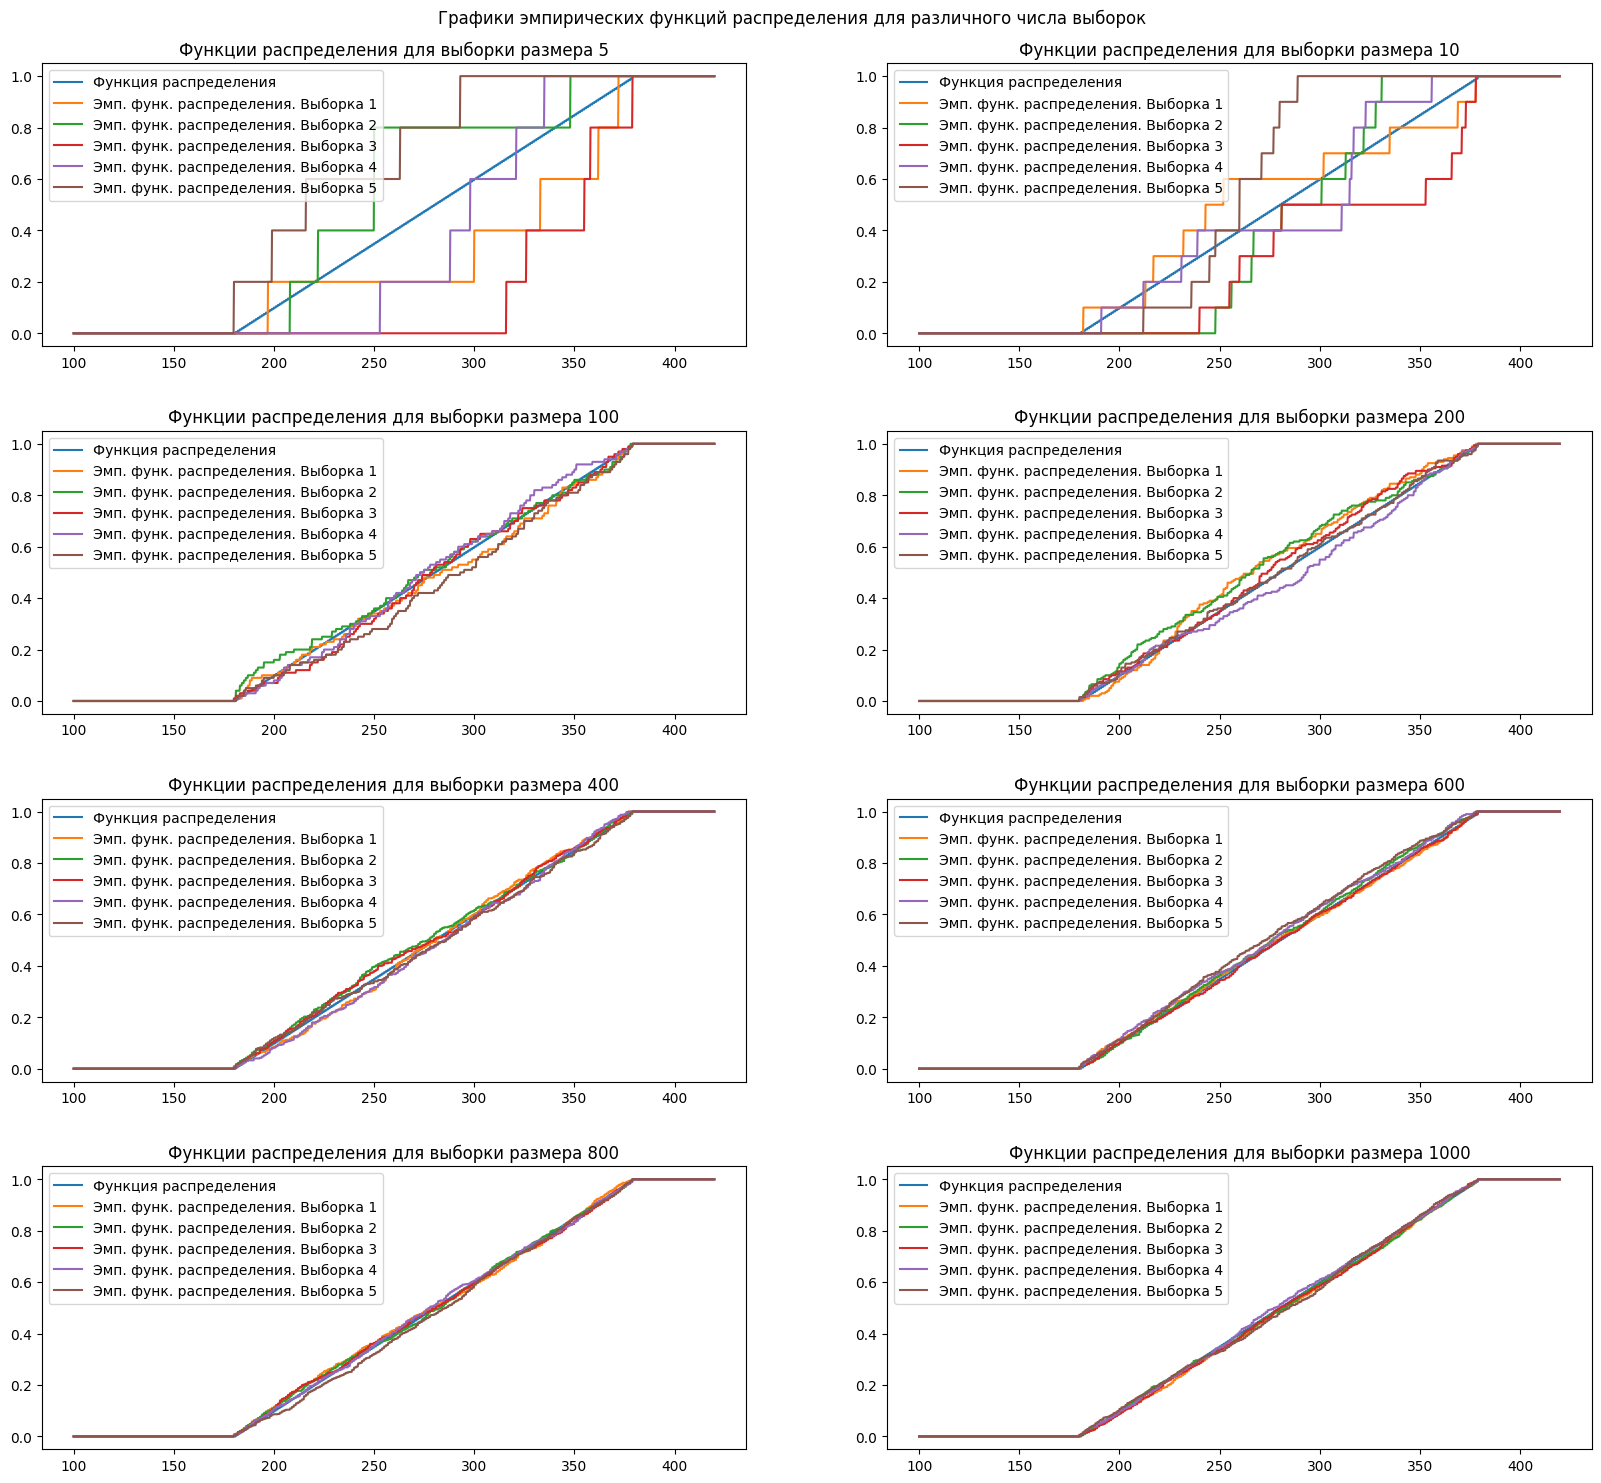

In [8]:
emp_function_discrete = np.zeros(shape=(1, 1600))

fig = plt.figure(figsize = (20, 18))
fig.suptitle('Графики эмпирических функций распределения для различного числа выборок', y=0.91)
fig.subplots_adjust(hspace = 0.3, wspace = 0.2)

for i in range(1, 9):
    ax = fig.add_subplot(4, 2, i)
    t = pd.DataFrame(np.arange(100,420,0.2))
    plt.plot(t[0], t[0].apply(lambda x: (math.floor(x) - 180) / 200 if 180 <= x <= 379 else 0 if x < 180 else 1).values, label='Функция распределения')
    for j in range(5):
        l = pd.read_csv('discrete/discrete_sample_size_' + str(sample_sizes[i - 1]) + '_number_' + str(j + 1) + '.csv')
        s = np.array([l.apply(lambda x: x <= k).sum() / sample_sizes[i - 1] for k in t[0].values]).T
        emp_function_discrete = np.concatenate([emp_function_discrete, s])
        plt.plot(t[0], s[0], label='Эмп. функ. распределения. Выборка ' + str(j + 1))
        plt.title('Функции распределения для выборки размера ' + str(sample_sizes[i - 1]))
        plt.legend()

emp_function_discrete = emp_function_discrete[1:, :]

### Графики для нормального распределения

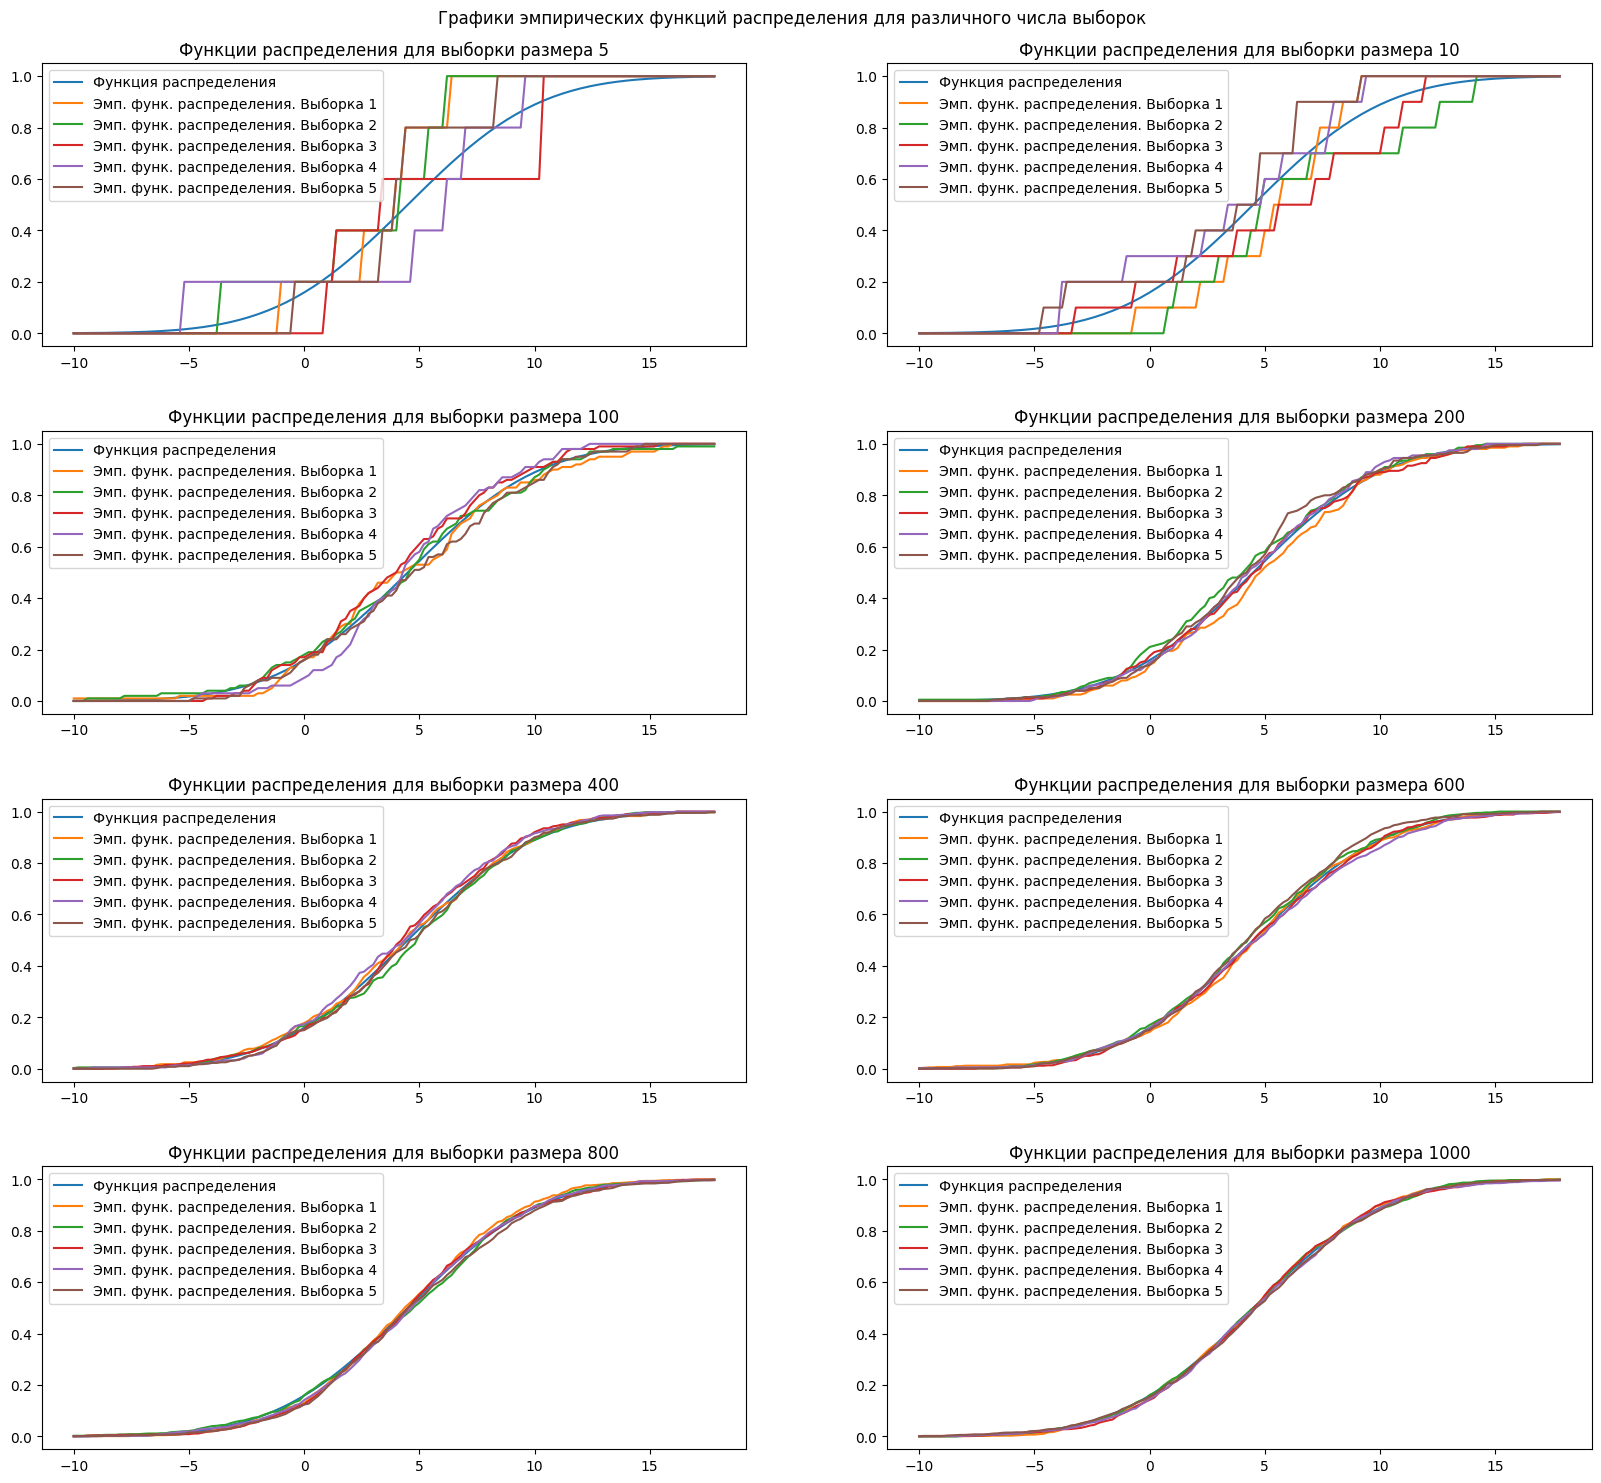

In [9]:
emp_function_cont = np.zeros(shape=(1, 140))

fig = plt.figure(figsize = (20, 18))
fig.suptitle('Графики эмпирических функций распределения для различного числа выборок', y=0.91)
fig.subplots_adjust(hspace = 0.3, wspace = 0.2)

for i in range(1, 9):
    ax = fig.add_subplot(4, 2, i)
    t = pd.DataFrame(np.arange(-10, 18,0.2))
    plt.plot(t[0], stats.norm.cdf(t[0], 4.5, 4.5), label='Функция распределения')
    for j in range(5):
        l = pd.read_csv('cont/cont_sample_size_' + str(sample_sizes[i - 1]) + '_number_' + str(j + 1) + '.csv')
        s = np.array([l.apply(lambda x: x <= k).sum() / sample_sizes[i - 1] for k in t[0].values]).T
        emp_function_cont = np.concatenate([emp_function_cont, s])
        plt.plot(t[0], s[0], label='Эмп. функ. распределения. Выборка ' + str(j + 1))
        plt.title('Функции распределения для выборки размера ' + str(sample_sizes[i - 1]))
        plt.legend()

emp_function_cont = emp_function_cont[1:, :]

### $D_{m, n}$ для дискретного распределения

In [10]:
D_discrete = pd.DataFrame(np.zeros((8, 8)), columns=['5', '10', '100', '200', '400', '600', '800', '1000'], index=['5', '10', '100', '200', '400', '600', '800', '1000'])

for i in range(40):
    for j in range(40):
        mx = max(np.abs(emp_function_discrete[i] - emp_function_discrete[j]))
        mn = math.sqrt( (sample_sizes[i // 5] * sample_sizes[j // 5]) / (sample_sizes[i // 5] + sample_sizes[j // 5]) )
        D_discrete.iloc[i // 5, j // 5] =  max(mn * mx, D_discrete.iloc[i // 5, j // 5])

In [11]:
D_discrete

,5,10,100,200,400,600,800,1000
5,1.581139,1.825742,1.527525,1.667516,1.538889,1.588457,1.526942,1.518970
10,1.825742,1.341641,1.537708,1.651046,1.499268,1.442675,1.516351,1.507214
100,1.527525,1.537708,0.848528,1.510519,1.252198,1.311578,1.107801,0.972532
200,1.667516,1.651046,1.510519,1.650000,1.443376,1.449281,1.486271,1.471734
400,1.538889,1.499268,1.252198,1.443376,1.272792,1.226445,1.265570,1.225474
600,1.588457,1.442675,1.311578,1.449281,1.226445,1.039230,1.365585,1.361999
800,1.526942,1.516351,1.107801,1.486271,1.265570,1.365585,1.175000,1.069904
1000,1.518970,1.507214,0.972532,1.471734,1.225474,1.361999,1.069904,1.006231


### $D_{m, n}$ для нормального распределения

In [12]:
D_cont = pd.DataFrame(np.zeros((8, 8)), columns=['5', '10', '100', '200', '400', '600', '800', '1000'], index=['5', '10', '100', '200', '400', '600', '800', '1000'])

for i in range(40):
    for j in range(40):
        mx = max(np.abs(emp_function_cont[i] - emp_function_cont[j]))
        mn = math.sqrt( (sample_sizes[i // 5] * sample_sizes[j // 5]) / (sample_sizes[i // 5] + sample_sizes[j // 5]) )
        D_cont.iloc[i // 5, j // 5] =  max(mn * mx, D_cont.iloc[i // 5, j // 5])

In [13]:
D_cont

,5,10,100,200,400,600,800,1000
5,0.948683,0.912871,0.894693,0.850323,0.850000,0.831342,0.860995,0.818593
10,0.912871,0.894427,0.874383,0.864099,0.804295,0.815425,0.856385,0.786646
100,0.894693,0.874383,0.919239,1.306395,1.028591,0.987541,1.001735,0.886720
200,0.850323,0.864099,1.306395,1.300000,1.529978,1.388044,1.691819,1.445914
400,0.850000,0.804295,1.028591,1.529978,1.308148,1.265175,1.224745,1.149410
600,0.831342,0.815425,0.987541,1.388044,1.265175,1.183568,1.188136,1.090890
800,0.860995,0.856385,1.001735,1.691819,1.224745,1.188136,1.025000,1.043552
1000,0.818593,0.786646,0.886720,1.445914,1.149410,1.090890,1.043552,0.782624


### Полигон частот для равномерного дискретного распределения

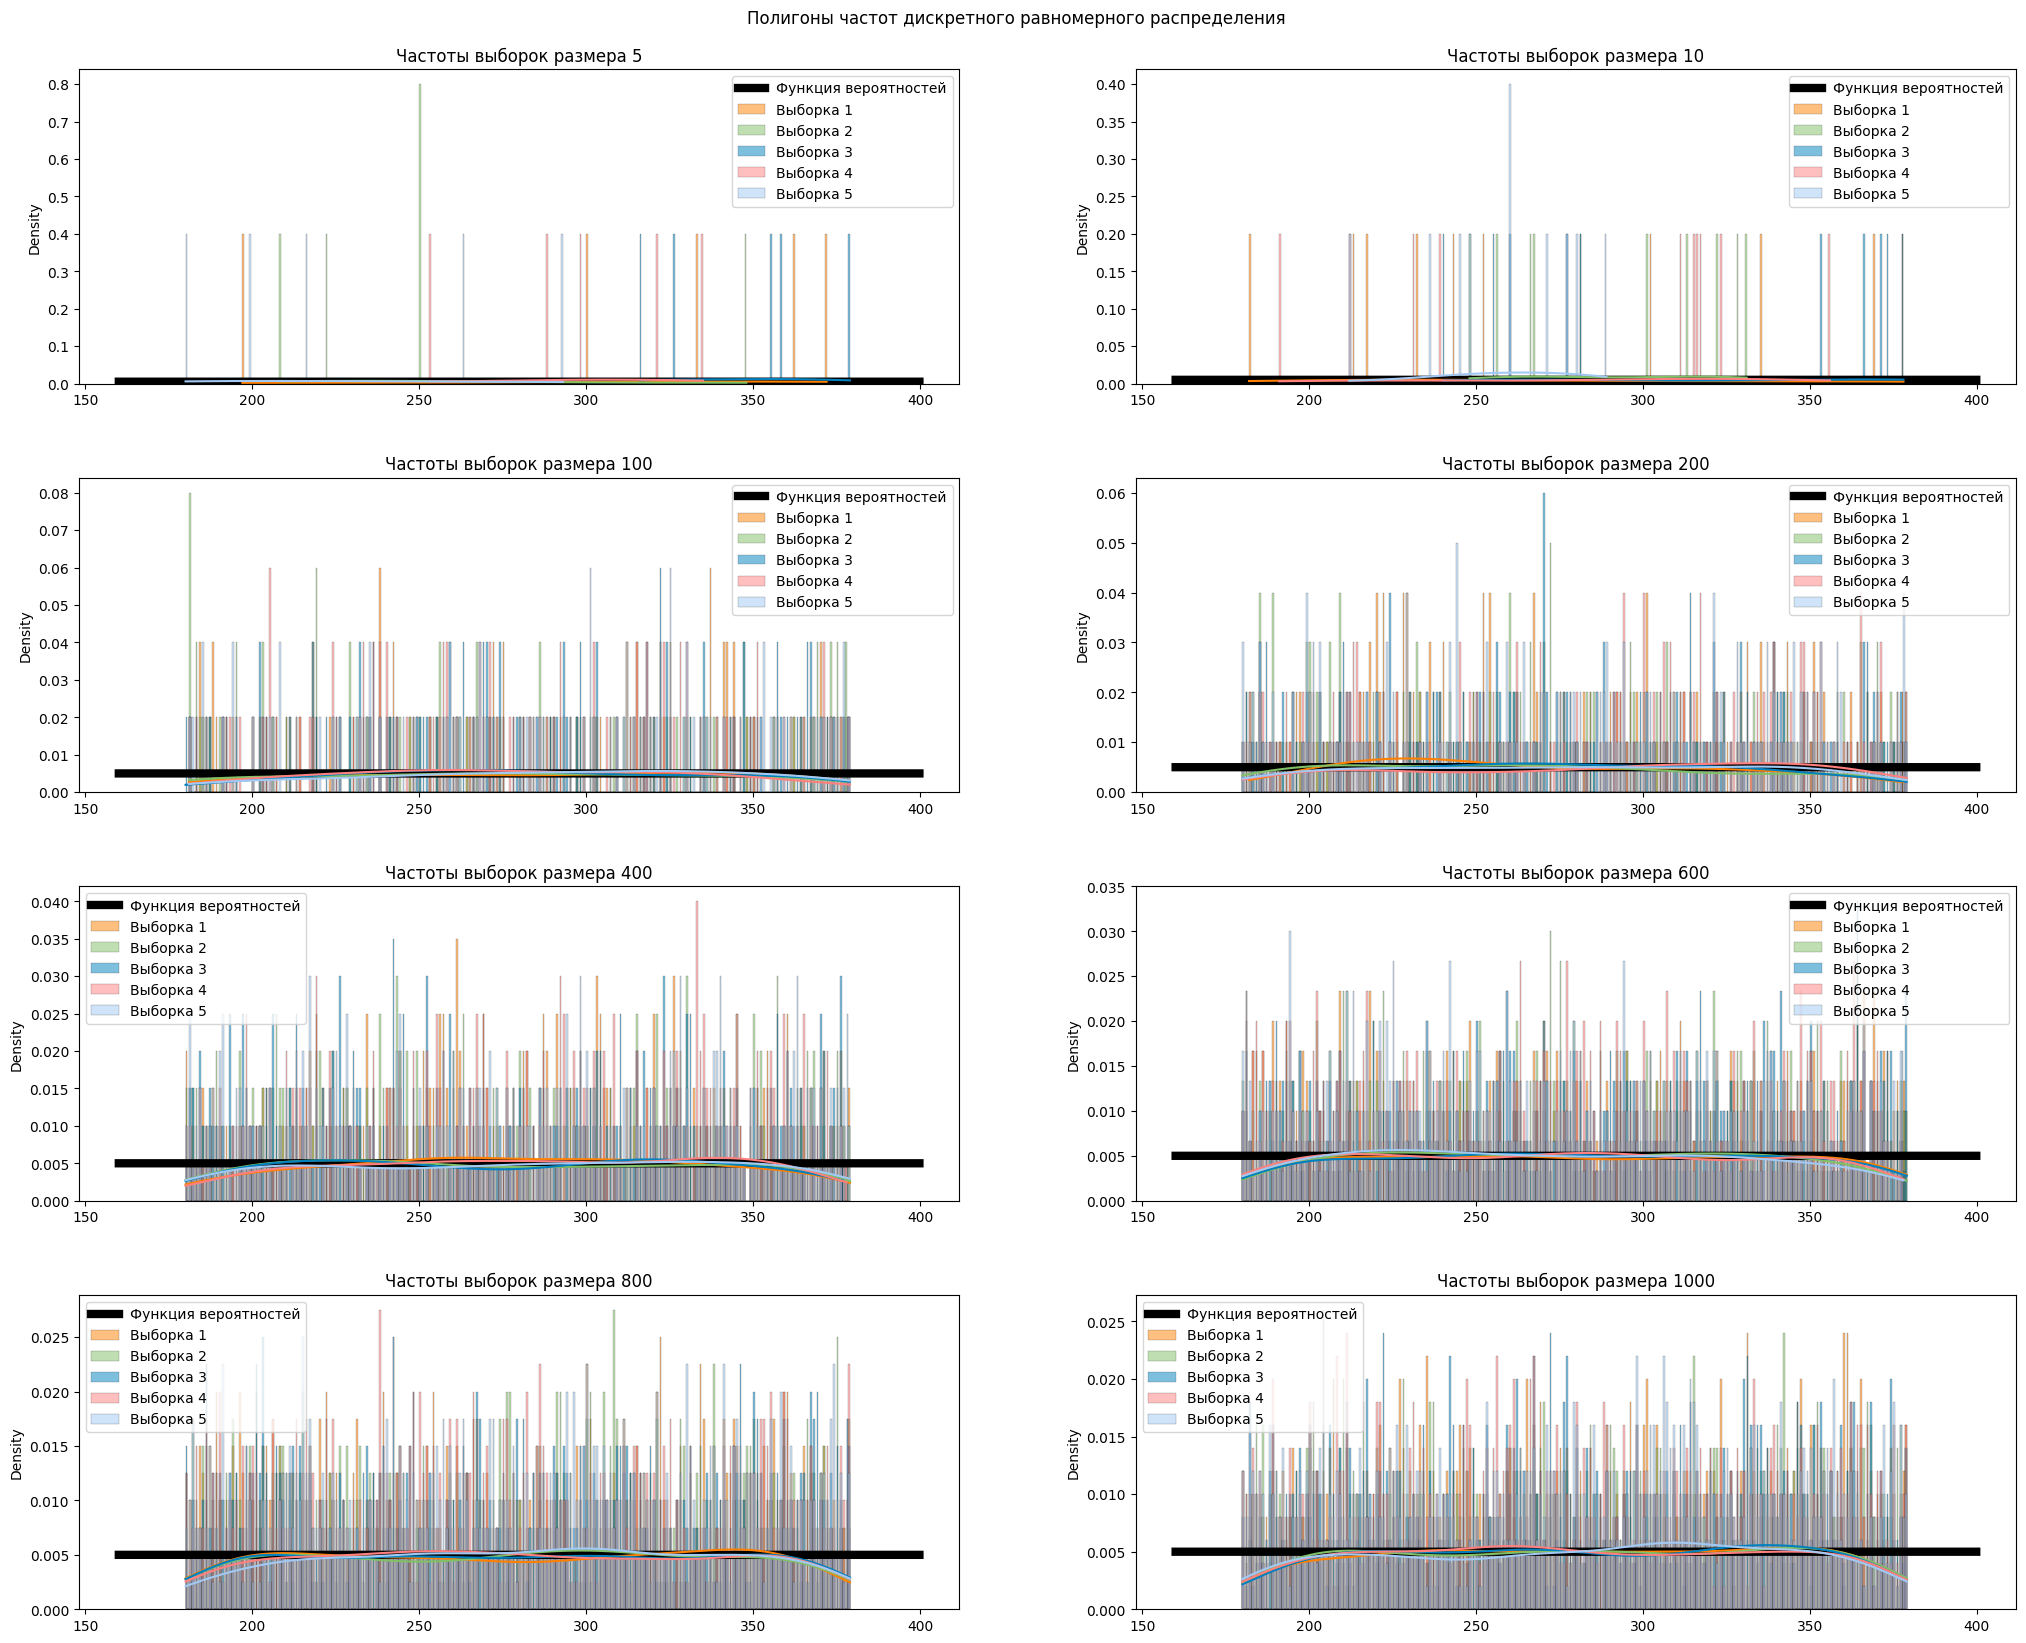

In [30]:
fig = plt.figure(figsize = (25, 20))
fig.suptitle('Полигоны частот дискретного равномерного распределения', y=0.91)
fig.subplots_adjust(hspace = 0.3, wspace = 0.2)

for i in range(1, 9):
    ax = fig.add_subplot(4, 2, i)
    t = pd.DataFrame(np.arange(160, 400, 0.2))
    plt.plot(t[0], np.full(shape=t[0].shape[0], fill_value=1 / 200), label='Функция вероятностей', linewidth=6, color='black')

    colors = ['autumn', 'summer', 'winter', 'spring', 'pastel']
    for j in range(5):
        l = pd.read_csv('discrete/discrete_sample_size_' + str(sample_sizes[i - 1]) + '_number_' + str(j + 1) + '.csv')
        sns.histplot(data=l, binwidth=0.5, bins=1000, label='Выборка ' + str(j + 1), stat='density', palette=colors[j], kde=True)
    plt.legend()
    plt.title('Частоты выборок размера ' + str(sample_sizes[i - 1]))

plt.show()

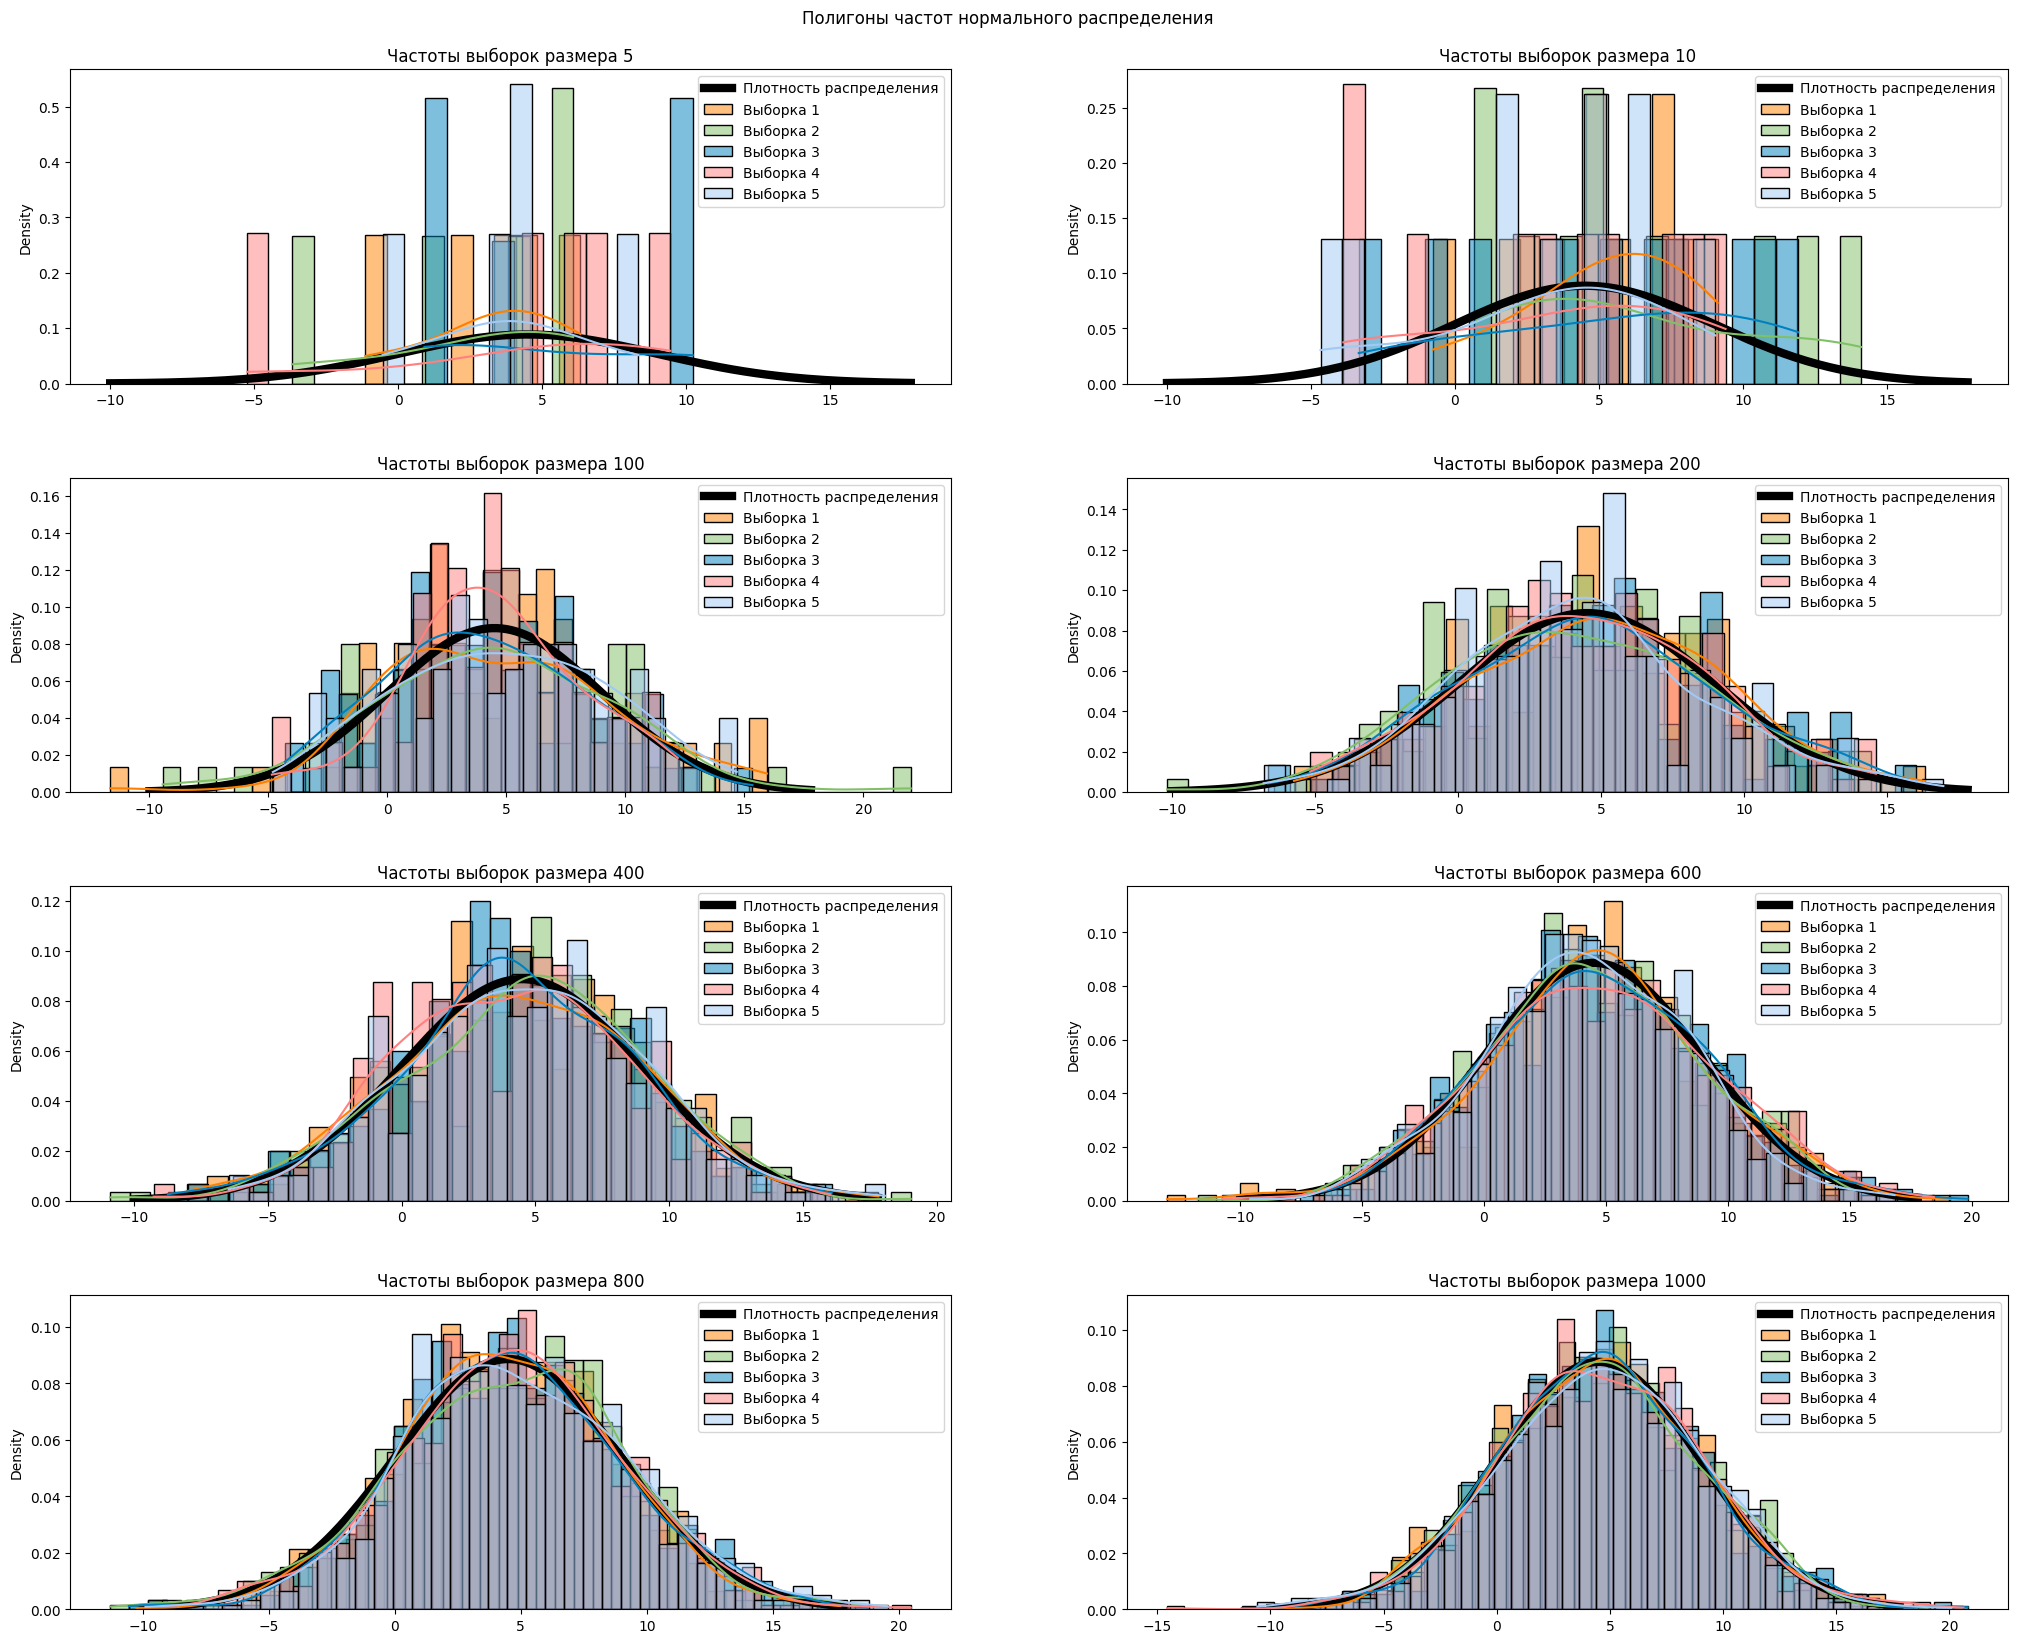

In [29]:
fig = plt.figure(figsize = (25, 20))
fig.suptitle('Полигоны частот нормального распределения', y=0.91)
fig.subplots_adjust(hspace = 0.3, wspace = 0.2)

for i in range(1, 9):
    ax = fig.add_subplot(4, 2, i)
    t = pd.DataFrame(np.arange(-10, 18,0.2))
    plt.plot(t[0], stats.norm.pdf(t[0], 4.5, 4.5), label='Плотность распределения', linewidth=6, color='black')

    colors = ['autumn', 'summer', 'winter', 'spring', 'pastel']
    for j in range(5):
        l = pd.read_csv('cont/cont_sample_size_' + str(sample_sizes[i - 1]) + '_number_' + str(j + 1) + '.csv')
        sns.histplot(data=l, binwidth=0.75, label='Выборка ' + str(j + 1), stat='density', palette=colors[j], kde=True)
    plt.legend()
    plt.title('Частоты выборок размера ' + str(sample_sizes[i - 1]))

plt.show()

### Вычисление выборочного среднего и выборочной дисперсии дискретного равномерного распределения



Определим матожидание и дисперсию

In [16]:
M_discrete = (2 * 180 + 200 -1) / 2
D_discrete = (200 ** 2 - 1) / 12

Таблица средних выборочных, под ней - таблица разницы средних выборочных и матожидания распределения

In [17]:
M_discrete_array = []
for i in sample_sizes:
    vib = []
    for j in range(5):
        l = pd.read_csv('discrete/discrete_sample_size_' + str(i) + '_number_' + str(j + 1) + '.csv')
        vib.append(round(l.mean().values[0], 3))
    M_discrete_array.append(vib)

display(pd.DataFrame(M_discrete_array, columns=['Выборка 1', 'Выборка 2', 'Выборка 3', 'Выборка 4', 'Выборка 5'],
                      index=['Выборка размера 5', 'Выборка размера 10', 'Выборка размера 100', 'Выборка размера 200', 'Выборка размера 400', 'Выборка размера 600', 'Выборка размера 800', 'Выборка размера 1000']))
display(pd.DataFrame(M_discrete_array, columns=['Выборка 1', 'Выборка 2', 'Выборка 3', 'Выборка 4', 'Выборка 5'],
                      index=['Выборка размера 5', 'Выборка размера 10', 'Выборка размера 100', 'Выборка размера 200', 'Выборка размера 400', 'Выборка размера 600', 'Выборка размера 800', 'Выборка размера 1000']) - M_discrete)

,Выборка 1,Выборка 2,Выборка 3,Выборка 4,Выборка 5
Выборка размера 5,312.800,255.600,346.800,299.000,230.200
Выборка размера 10,272.300,291.300,315.400,281.100,257.800
Выборка размера 100,283.730,277.420,282.680,278.500,288.570
Выборка размера 200,272.475,270.850,275.915,285.065,278.885
Выборка размера 400,280.840,277.282,278.345,283.218,281.852
Выборка размера 600,279.813,278.203,280.743,276.262,274.753
Выборка размера 800,279.096,279.670,280.028,279.810,283.230
Выборка размера 1000,281.991,281.351,281.836,279.718,281.046


,Выборка 1,Выборка 2,Выборка 3,Выборка 4,Выборка 5
Выборка размера 5,33.300,-23.900,67.300,19.500,-49.300
Выборка размера 10,-7.200,11.800,35.900,1.600,-21.700
Выборка размера 100,4.230,-2.080,3.180,-1.000,9.070
Выборка размера 200,-7.025,-8.650,-3.585,5.565,-0.615
Выборка размера 400,1.340,-2.218,-1.155,3.718,2.352
Выборка размера 600,0.313,-1.297,1.243,-3.238,-4.747
Выборка размера 800,-0.404,0.170,0.528,0.310,3.730
Выборка размера 1000,2.491,1.851,2.336,0.218,1.546


Таблица выборочных дисперсий, под ней - таблица разницы выборочных дисперсий и дисперсии распределения

In [18]:
D_discrete_array = []
for i in sample_sizes:
    vib = []
    for j in range(5):
        l = pd.read_csv('discrete/discrete_sample_size_' + str(i) + '_number_' + str(j + 1) + '.csv')
        vib.append(round(np.mean((l.values - l.values.mean()) ** 2), 3))
    D_discrete_array.append(vib)

display(pd.DataFrame(D_discrete_array, columns=['Выборка 1', 'Выборка 2', 'Выборка 3', 'Выборка 4', 'Выборка 5'],
                      index=['Выборка размера 5', 'Выборка размера 10', 'Выборка размера 100', 'Выборка размера 200', 'Выборка размера 400', 'Выборка размера 600', 'Выборка размера 800', 'Выборка размера 1000']))
display(pd.DataFrame(D_discrete_array, columns=['Выборка 1', 'Выборка 2', 'Выборка 3', 'Выборка 4', 'Выборка 5'],
                      index=['Выборка размера 5', 'Выборка размера 10', 'Выборка размера 100', 'Выборка размера 200', 'Выборка размера 400', 'Выборка размера 600', 'Выборка размера 800', 'Выборка размера 1000']) - D_discrete)

,Выборка 1,Выборка 2,Выборка 3,Выборка 4,Выборка 5
Выборка размера 5,3981.360,2399.040,522.160,803.600,1742.960
Выборка размера 10,4296.010,888.810,2936.240,2909.090,485.160
Выборка размера 100,3608.297,3756.364,3115.778,2902.910,3318.685
Выборка размера 200,2967.649,3499.918,3114.348,3472.611,3388.502
Выборка размера 400,3041.169,3493.848,3392.656,3079.730,3540.571
Выборка размера 600,3522.785,3185.059,3345.674,3346.517,3237.649
Выборка размера 800,3496.344,3434.899,3519.087,3382.259,3206.977
Выборка размера 1000,3279.769,3357.182,3256.117,3279.788,3307.254


,Выборка 1,Выборка 2,Выборка 3,Выборка 4,Выборка 5
Выборка размера 5,648.110,-934.210,-2811.090,-2529.650,-1590.290
Выборка размера 10,962.760,-2444.440,-397.010,-424.160,-2848.090
Выборка размера 100,275.047,423.114,-217.472,-430.340,-14.565
Выборка размера 200,-365.601,166.668,-218.902,139.361,55.252
Выборка размера 400,-292.081,160.598,59.406,-253.520,207.321
Выборка размера 600,189.535,-148.191,12.424,13.267,-95.601
Выборка размера 800,163.094,101.649,185.837,49.009,-126.273
Выборка размера 1000,-53.481,23.932,-77.133,-53.462,-25.996


### Вычисление выборочного среднего и выборочной дисперсии нормального распределения

In [19]:
M_cont = 4.5
D_cont = 4.5 ** 2

Таблица средних выборочных, под ней - таблица разницы средних выборочных и матожидания распределения

In [20]:
M_cont_array = []
for i in sample_sizes:
    vib = []
    for j in range(5):
        l = pd.read_csv('cont/cont_sample_size_' + str(i) + '_number_' + str(j + 1) + '.csv')
        vib.append(round(l.mean().values[0], 3))
    M_cont_array.append(vib)

display(pd.DataFrame(M_cont_array, columns=['Выборка 1', 'Выборка 2', 'Выборка 3', 'Выборка 4', 'Выборка 5'],
                      index=['Выборка размера 5', 'Выборка размера 10', 'Выборка размера 100', 'Выборка размера 200', 'Выборка размера 400', 'Выборка размера 600', 'Выборка размера 800', 'Выборка размера 1000']))
display(pd.DataFrame(M_cont_array, columns=['Выборка 1', 'Выборка 2', 'Выборка 3', 'Выборка 4', 'Выборка 5'],
                      index=['Выборка размера 5', 'Выборка размера 10', 'Выборка размера 100', 'Выборка размера 200', 'Выборка размера 400', 'Выборка размера 600', 'Выборка размера 800', 'Выборка размера 1000']) - M_cont)

,Выборка 1,Выборка 2,Выборка 3,Выборка 4,Выборка 5
Выборка размера 5,3.184,2.653,5.187,4.368,3.885
Выборка размера 10,5.196,6.254,5.406,3.264,2.975
Выборка размера 100,4.645,4.446,4.069,4.416,4.874
Выборка размера 200,4.935,4.083,4.554,4.424,4.247
Выборка размера 400,4.346,4.626,4.292,4.195,4.661
Выборка размера 600,4.555,4.281,4.636,4.673,4.226
Выборка размера 800,4.432,4.540,4.620,4.611,4.811
Выборка размера 1000,4.501,4.497,4.573,4.638,4.583


,Выборка 1,Выборка 2,Выборка 3,Выборка 4,Выборка 5
Выборка размера 5,-1.316,-1.847,0.687,-0.132,-0.615
Выборка размера 10,0.696,1.754,0.906,-1.236,-1.525
Выборка размера 100,0.145,-0.054,-0.431,-0.084,0.374
Выборка размера 200,0.435,-0.417,0.054,-0.076,-0.253
Выборка размера 400,-0.154,0.126,-0.208,-0.305,0.161
Выборка размера 600,0.055,-0.219,0.136,0.173,-0.274
Выборка размера 800,-0.068,0.040,0.120,0.111,0.311
Выборка размера 1000,0.001,-0.003,0.073,0.138,0.083


Таблица выборочных дисперсий, под ней - таблица разницы выборочных дисперсий и дисперсии распределения

In [21]:
D_cont_array = []
for i in sample_sizes:
    vib = []
    for j in range(5):
        l = pd.read_csv('cont/cont_sample_size_' + str(i) + '_number_' + str(j + 1) + '.csv')
        vib.append(round(np.mean((l.values - l.values.mean()) ** 2), 3))
    D_cont_array.append(vib)

display(pd.DataFrame(D_cont_array, columns=['Выборка 1', 'Выборка 2', 'Выборка 3', 'Выборка 4', 'Выборка 5'],
                      index=['Выборка размера 5', 'Выборка размера 10', 'Выборка размера 100', 'Выборка размера 200', 'Выборка размера 400', 'Выборка размера 600', 'Выборка размера 800', 'Выборка размера 1000']))
display(pd.DataFrame(D_cont_array, columns=['Выборка 1', 'Выборка 2', 'Выборка 3', 'Выборка 4', 'Выборка 5'],
                      index=['Выборка размера 5', 'Выборка размера 10', 'Выборка размера 100', 'Выборка размера 200', 'Выборка размера 400', 'Выборка размера 600', 'Выборка размера 800', 'Выборка размера 1000']) - D_cont)

,Выборка 1,Выборка 2,Выборка 3,Выборка 4,Выборка 5
Выборка размера 5,6.149,12.655,17.590,25.525,8.016
Выборка размера 10,8.238,19.953,23.867,20.846,17.146
Выборка размера 100,22.764,25.440,17.117,13.007,19.572
Выборка размера 200,18.821,20.257,20.033,17.637,18.274
Выборка размера 400,20.694,20.246,18.538,18.356,18.993
Выборка размера 600,21.002,19.398,19.892,21.866,17.505
Выборка размера 800,17.409,20.949,19.000,19.238,20.028
Выборка размера 1000,18.786,19.783,19.328,20.399,20.798


,Выборка 1,Выборка 2,Выборка 3,Выборка 4,Выборка 5
Выборка размера 5,-14.101,-7.595,-2.660,5.275,-12.234
Выборка размера 10,-12.012,-0.297,3.617,0.596,-3.104
Выборка размера 100,2.514,5.190,-3.133,-7.243,-0.678
Выборка размера 200,-1.429,0.007,-0.217,-2.613,-1.976
Выборка размера 400,0.444,-0.004,-1.712,-1.894,-1.257
Выборка размера 600,0.752,-0.852,-0.358,1.616,-2.745
Выборка размера 800,-2.841,0.699,-1.250,-1.012,-0.222
Выборка размера 1000,-1.464,-0.467,-0.922,0.149,0.548
